# 1-Define the library

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# 2- Read the data

In [126]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_sub=pd.read_csv('submission.csv')

# 3-Preprocessing the Data

In [121]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
df.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
df.fillna(df.median(),inplace=True)
df.dropna(inplace=True)
df=pd.get_dummies(df)

C:\Users\Omar Nabawi\AppData\Local\Temp\ipykernel_19260\29387153.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


In [123]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [128]:
df_test.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
df_test.fillna(df.median(),inplace=True)
df_test.dropna(inplace=True)
df_test=pd.get_dummies(df_test)

# 4-Visalosation

<AxesSubplot:>

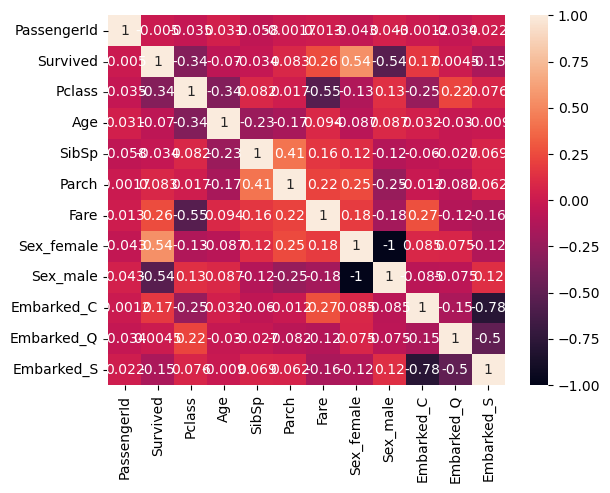

In [112]:
sns.heatmap(data=df.corr(),annot=True)

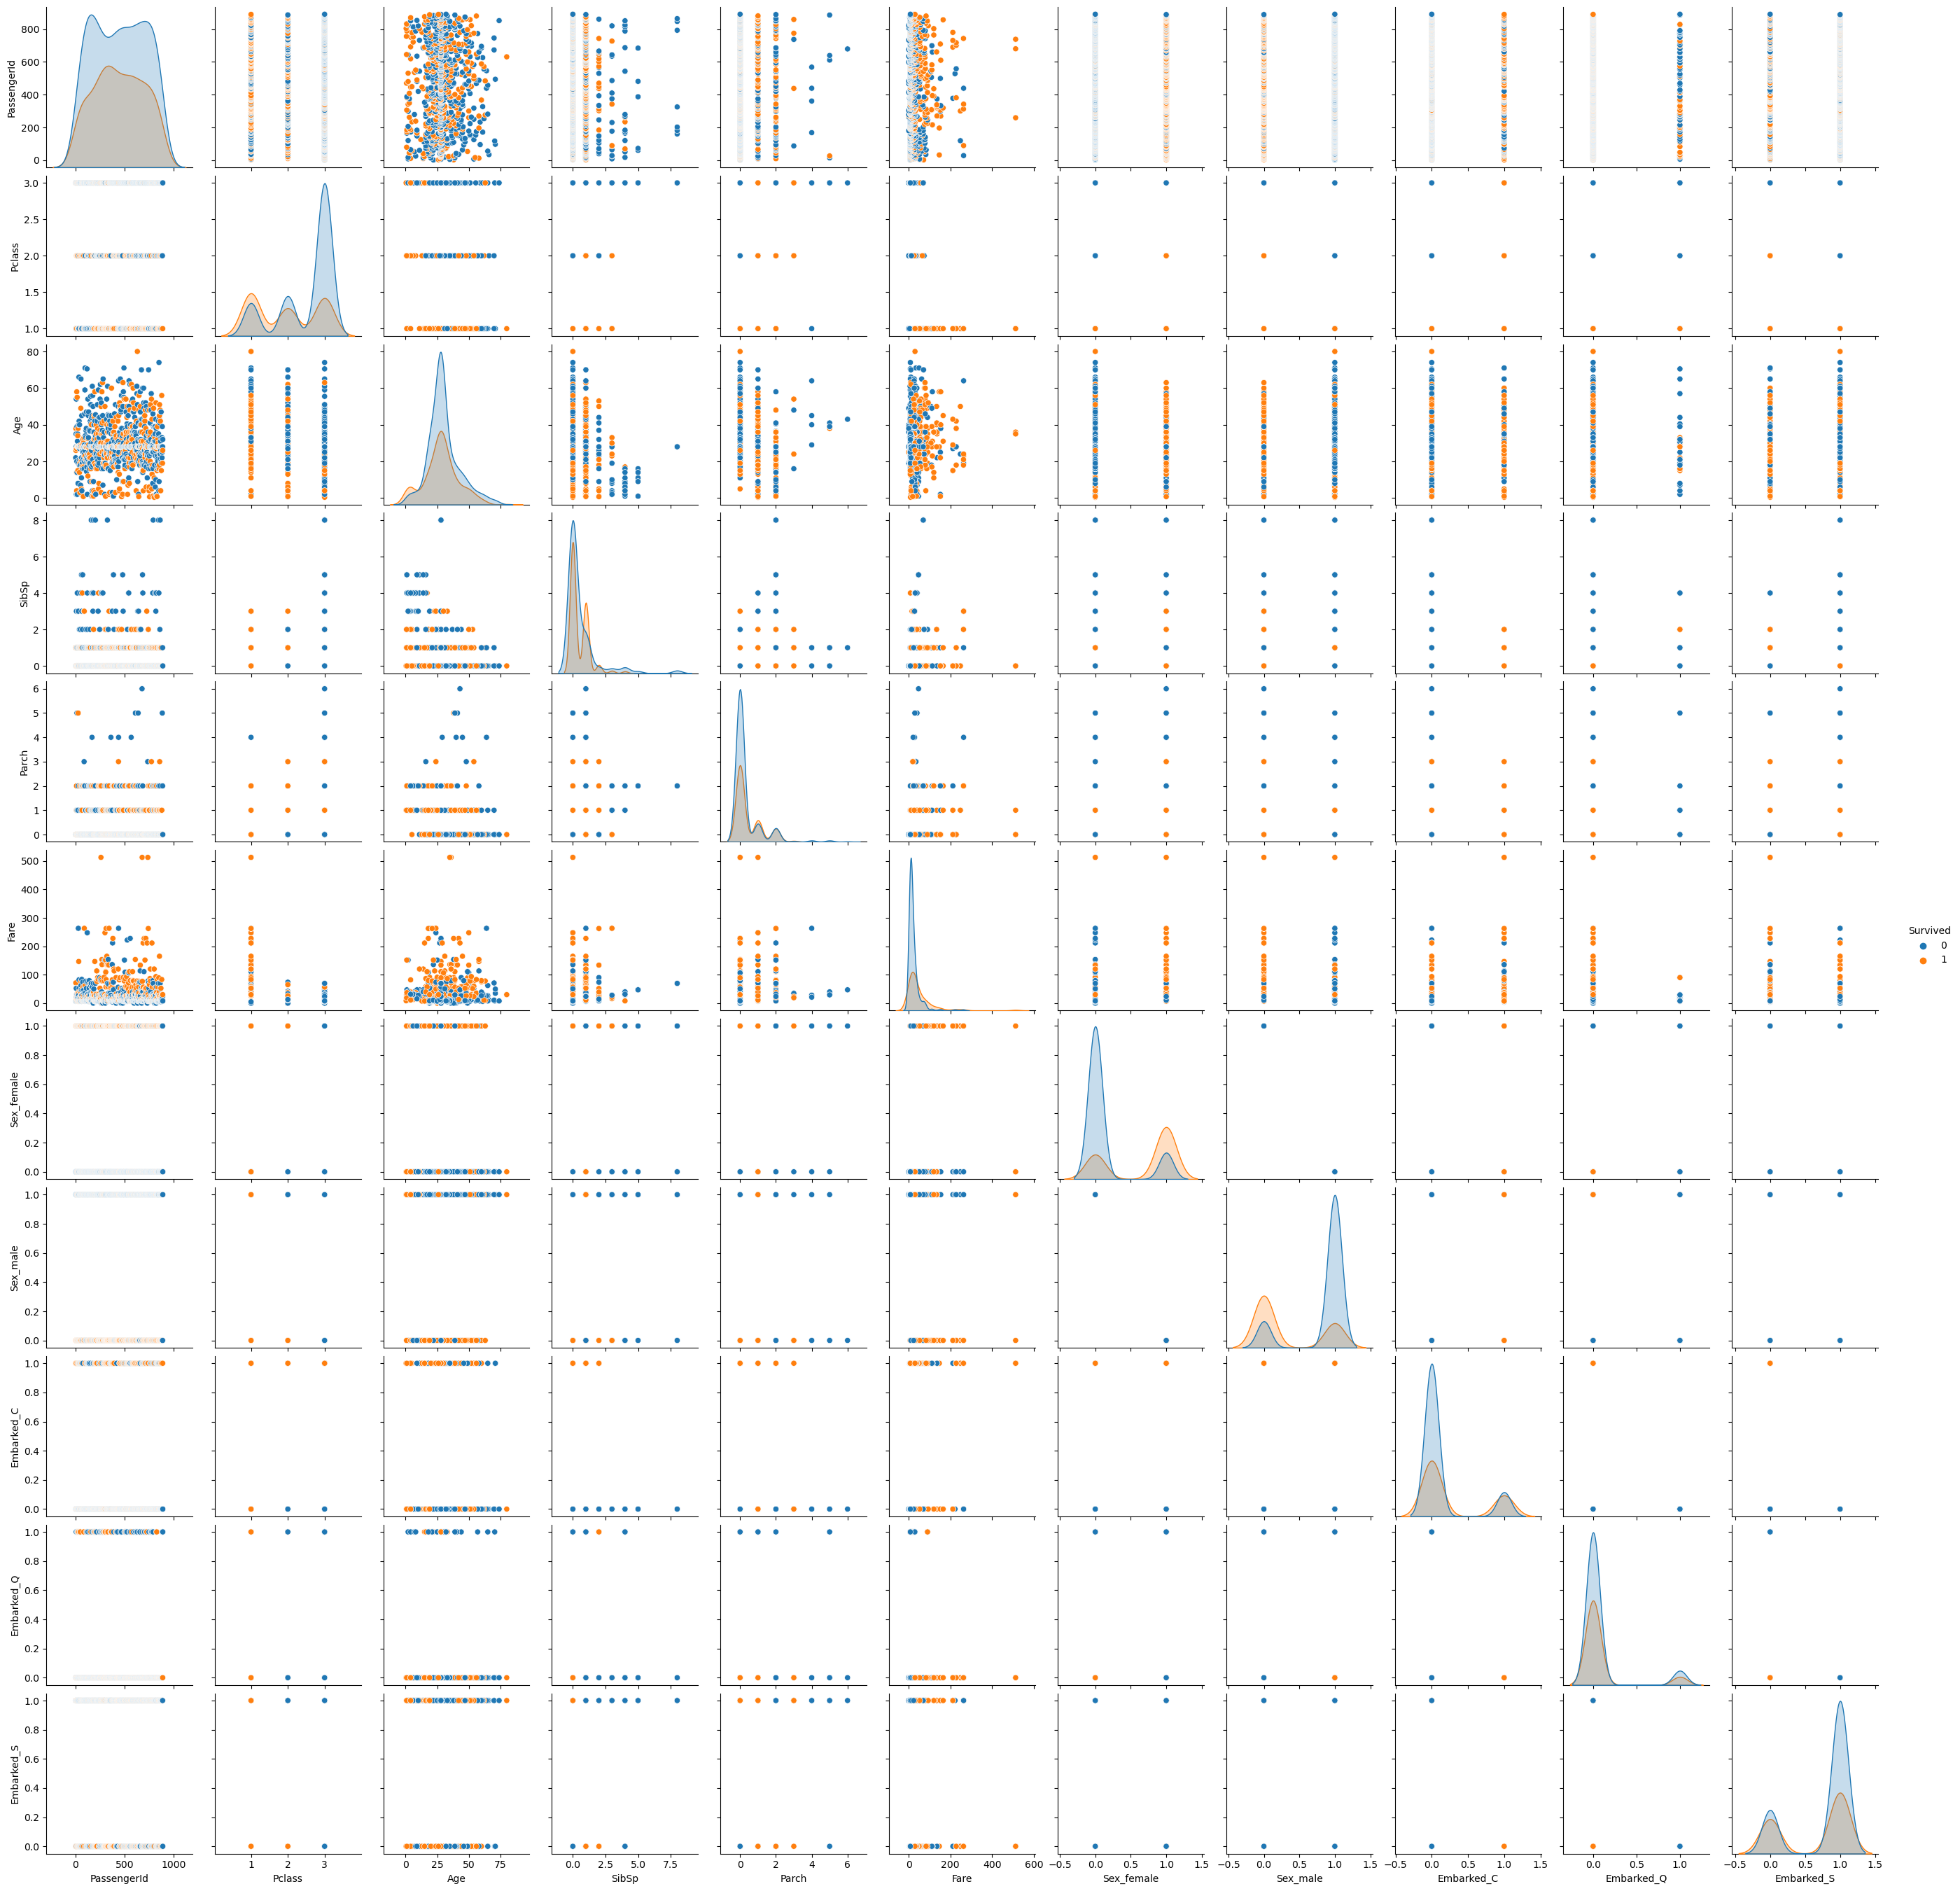

In [113]:
sns.pairplot(data=df,hue='Survived')

# 5-Splitting the Data 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=150)

# 6-The choose the best model by Pycaret

In [133]:
from pycaret.classification import ClassificationExperiment

In [134]:
s=ClassificationExperiment()

In [135]:
s.setup(data=df,target='Survived',session_id=123)
best=s.compare_models()
print(best)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(889, 12)"
4,Transformed data shape,"(889, 12)"
5,Transformed train set shape,"(622, 12)"
6,Transformed test set shape,"(267, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8103,0.8476,0.6976,0.7915,0.7371,0.5901,0.5970,0.0820
et,Extra Trees Classifier,0.8006,0.8340,0.6766,0.7829,0.7192,0.5668,0.5755,0.0790
rf,Random Forest Classifier,0.7974,0.8490,0.6687,0.7796,0.7130,0.5590,0.5681,0.1110
lightgbm,Light Gradient Boosting Machine,0.7908,0.8331,0.6938,0.7521,0.7166,0.5519,0.5577,0.1000
xgboost,Extreme Gradient Boosting,0.7813,0.8342,0.6685,0.7411,0.6993,0.5287,0.5334,0.0390
nb,Naive Bayes,0.7749,0.8218,0.6937,0.7111,0.6986,0.5199,0.5229,0.0210
lr,Logistic Regression,0.7733,0.8306,0.6853,0.7133,0.6942,0.5154,0.5196,1.4520
ridge,Ridge Classifier,0.7733,0.8331,0.6643,0.7204,0.6876,0.5112,0.5150,0.0140
lda,Linear Discriminant Analysis,0.7717,0.8331,0.6643,0.7164,0.6863,0.5082,0.5114,0.0180
ada,Ada Boost Classifier,0.7668,0.8201,0.6725,0.7115,0.6872,0.5023,0.5066,0.0600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# 7- The Best one

In [136]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8352,0.8559,0.7157,0.8295,0.7684,0.6416,0.6458


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,prediction_label,prediction_score
855,856,3,18.0,0,1,9.350000,1,0,0,0,1,1,0,0.8253
178,179,2,30.0,0,0,13.000000,0,1,0,0,1,0,0,0.8737
120,121,2,21.0,2,0,73.500000,0,1,0,0,1,0,0,0.9398
699,700,3,42.0,0,0,7.650000,0,1,0,0,1,0,0,0.9341
738,739,3,28.0,0,0,7.895800,0,1,0,0,1,0,0,0.9244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,431,1,28.0,0,0,26.549999,0,1,0,0,1,1,1,0.5781
311,312,1,18.0,2,2,262.375000,1,0,1,0,0,1,1,0.9461
652,653,3,21.0,0,0,8.433300,0,1,0,0,1,0,0,0.8806
542,543,3,11.0,4,2,31.275000,1,0,0,0,1,0,0,0.8770


# 8- The final Model

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [141]:

model.fit(x_train, y_train)
predictions = model.predict(df_test)

# 9-The Result

In [142]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived_pred': predictions,'Survived':df_sub['Survived']})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [143]:
output

,PassengerId,Survived_pred,Survived
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,0,0
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [144]:
accuracy_score(output['Survived'],output['Survived_pred'])

0.9712918660287081